In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


# Data Loading 

In [317]:
data = pd.read_csv(r"C:\Users\Mtime\OneDrive\Bureau\BTC-USD (1).csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-15,8705.190430,8836.190430,8456.450195,8510.379883,8510.379883,6705710080
1,2018-05-16,8504.410156,8508.429688,8175.490234,8368.830078,8368.830078,6760220160
2,2018-05-17,8370.049805,8445.540039,8054.120117,8094.319824,8094.319824,5862530048
3,2018-05-18,8091.830078,8274.120117,7974.819824,8250.969727,8250.969727,5764190208
4,2018-05-19,8255.730469,8372.059570,8183.350098,8247.179688,8247.179688,4712399872


In [318]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [247]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,21185.661064,21719.798356,20592.976069,21197.215837,21197.215837,2.760472e+10
std,18624.937168,19116.658206,18050.922572,18618.228170,18618.228170,2.067449e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7210.662232,7333.574707,7043.619385,7207.935424,7207.935424,1.383227e+10
50%,10161.855469,10331.775879,9893.782227,10163.614746,10163.614746,2.483786e+10
75%,38708.577148,39786.696289,37503.162110,38681.941407,38681.941407,3.705181e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1462 non-null   object 
 1   Open       1462 non-null   float64
 2   High       1462 non-null   float64
 3   Low        1462 non-null   float64
 4   Close      1462 non-null   float64
 5   Adj Close  1462 non-null   float64
 6   Volume     1462 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.1+ KB


In [249]:
data['Date'] = pd.to_datetime(data['Date'])

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1462 non-null   datetime64[ns]
 1   Open       1462 non-null   float64       
 2   High       1462 non-null   float64       
 3   Low        1462 non-null   float64       
 4   Close      1462 non-null   float64       
 5   Adj Close  1462 non-null   float64       
 6   Volume     1462 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.1 KB


# EDA

In [251]:
data.shape

(1462, 7)

In [252]:
data.xs(key='Close',axis=1).max()


67566.828125

A summary about Data 

In [253]:
print ('Over the last year, mean price of Bitcoin was ' + '$' + str(round(np.mean(data['Close']),2)) 
       + ', the highest price reached ' + '$' + str(round(max(data['Close']),2)) 
       + ' and the price dropped to minimum of ' + '$' + str(round(min(data['Close']),2)) + '.')  

Over the last year, mean price of Bitcoin was $21197.22, the highest price reached $67566.83 and the price dropped to minimum of $3236.76.


In [254]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add traces
fig.add_trace(go.Scatter(x=data['Date']
                         , y=data['Adj Close']
                         , name='Bitcoin'
                        )
             , secondary_y=False
             )
# Set slider selection buttons:
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label='7days', step='day', stepmode='backward'),
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate')
        ])
    )
)
fig.update_layout(
    title_text='Price of selected Cryptocurrencies'
)

# Set x-axis title
fig.update_xaxes(title_text='Date')

# Set y-axes titles
fig.update_yaxes(title_text='Bitcoin ($)', secondary_y=False)

C:\Users\Mtime\AppData\Local\Temp/ipykernel_13940/2222006619.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Mtime\AppData\Local\Temp/ipykernel_13940/2222006619.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



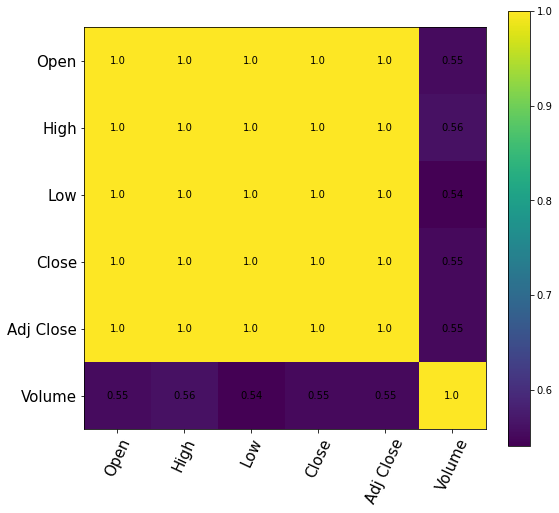

In [255]:
corrl=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Show all ticks and label them with the dataframe column name
ax.set_xticklabels(data.columns, rotation=65, fontsize=15)
ax.set_yticklabels(data.columns, rotation=0, fontsize=15)

# Loop over data dimensions and create text annotations
for i in range(len(data.columns)-1):
    for j in range(len(data.columns)-1):
        text = ax.text(j, i, round(corrl.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

plt.show()

array([[<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

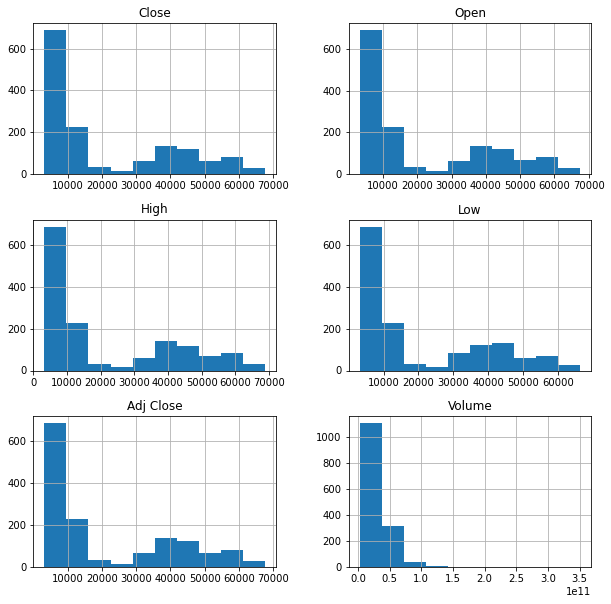

In [256]:
data.hist(column=['Close', 'Open','High','Low','Adj Close', 'Volume'],  figsize=[10, 10])

# Normalization 

In [319]:
data = data_train.drop(['Date','Adj Close'], axis =1)

In [320]:
data.head()

,Open,High,Low,Close,Volume
0,8705.190430,8836.190430,8456.450195,8510.379883,6705710080
1,8504.410156,8508.429688,8175.490234,8368.830078,6760220160
2,8370.049805,8445.540039,8054.120117,8094.319824,5862530048
3,8091.830078,8274.120117,7974.819824,8250.969727,5764190208
4,8255.730469,8372.059570,8183.350098,8247.179688,4712399872


In [321]:
Scaler = MinMaxScaler(feature_range =(0,1))
data = Scaler.fit_transform(np.array(data).reshape(-1,1))
data

array([[1.57105147e-08],
       [1.60837682e-08],
       [1.50017884e-08],
       ...,
       [1.21460239e-07],
       [1.22846383e-07],
       [1.05349136e-01]])

In [322]:
train_data = int(len(data)*0.7)
test_data = len(data) - train_data
train_data, test_data = data[0:train_data,:], data[train_data:len(data),:1]

In [323]:
train_data, test_data

(array([[1.57105147e-08],
        [1.60837682e-08],
        [1.50017884e-08],
        ...,
        [4.17777078e-08],
        [3.90900347e-08],
        [4.13887111e-08]]),
 array([[9.28889337e-02],
        [4.13950384e-08],
        [4.30020061e-08],
        ...,
        [1.21460239e-07],
        [1.22846383e-07],
        [1.05349136e-01]]))

In [324]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [325]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
look_back = 100
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [326]:
print(X_train.shape, y_train.shape)

(4543, 100) (4543,)


In [327]:
print(X_test.shape, y_test.shape)

(1890, 100) (1890,)


In [328]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM Model Building 

In [281]:


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [282]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
71/71 [==============================] - 40s 426ms/step - loss: 7.9946e-04 - val_loss: 0.0038
Epoch 2/100
71/71 [==============================] - 36s 514ms/step - loss: 7.6504e-04 - val_loss: 0.0039
Epoch 3/100
71/71 [==============================] - 29s 409ms/step - loss: 7.6365e-04 - val_loss: 0.0037
Epoch 4/100
71/71 [==============================] - 29s 411ms/step - loss: 6.1125e-04 - val_loss: 0.0030
Epoch 5/100
71/71 [==============================] - 29s 402ms/step - loss: 3.5367e-04 - val_loss: 0.0027
Epoch 6/100
71/71 [==============================] - 34s 486ms/step - loss: 3.4091e-04 - val_loss: 0.0028
Epoch 7/100
71/71 [==============================] - 28s 395ms/step - loss: 3.3482e-04 - val_loss: 0.0026
Epoch 8/100
71/71 [==============================] - 29s 408ms/step - loss: 3.4175e-04 - val_loss: 0.0024
Epoch 9/100
71/71 [==============================] - 33s 465ms/step - loss: 3.3729e-04 - val_loss: 0.0022
Epoch 10/100
71/71 [==========================

In [314]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


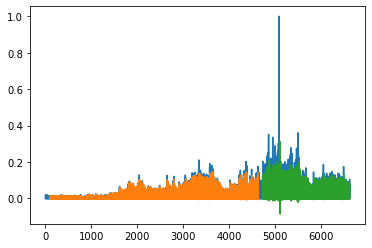

In [316]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

plt.plot(data)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [339]:
 # RMSE SCORE 
math.sqrt(mean_squared_error(y_train,train_predict))

0.0060424479207991785